# Big Picture 
##### What is the fundamental idea behind Support Vector Machine? 
The fundamental idea behind Support Vector Machines is to fit the widest possible “street”
between the classes. The goal is to have the largest possible margin between the
decision boundary that separates the two classes and the training instances. SVM is also capable of performing linear or nonlinear classification, regression, and even an outlier detection.
##### Why you use Support Vector Machine for this dataset?
The reason why I used this dataset is because SVM are well suited for classification of complex, but small - or medium-sized dataset and this dataset is a small sized classification dataset which will work best with SVM model. 

# Get the Data
I picked this dataset because the context of the dataset is very interesting and I wanted to know the feature importance of the dataset wheather or not if they are very important to predict wheather a patient has Malignant or  Benign cancer. Also, Support vector machine (SVM), it is very great with small or medium sized dataset and this dataset is a relatively a medium sized dataset. SVM will work really great with this dataset.


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from math import sqrt

URL: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
# Importing the dataset and review the dataset
data = pd.read_csv('BreastCancer.csv')
data.info()
data.describe()

NameError: name 'pd' is not defined

In [3]:
# Size of the dataset
import os
getSize = os.path.getsize("BreastCancer.csv")
print("Size of the dataset: {0:.3} MB".format(getSize/1048576))

Size of the dataset: 0.119 MB


##### How big is your dataset? (in terms of MB)
Size: 0.119 MB or 122.2KB
##### How many entries does it have?
Entries: 596 
##### How many features does it have?
Features: 33
##### What are some basic statistics you can learn right away about this dataset?
The basic statistics I can learn right away from the dataset is that, the convavity_mean and the concave points_mean has a minimum value of            0.00000. That means that the are some zero values in the dataset which has to be taken care of.

### Prep the data

In [4]:
data['diagnosis'] = data.diagnosis.map({'B':0, 'M':1})

In [5]:
drop = ["id","Unnamed: 32"]
dataset = data.drop(drop, axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


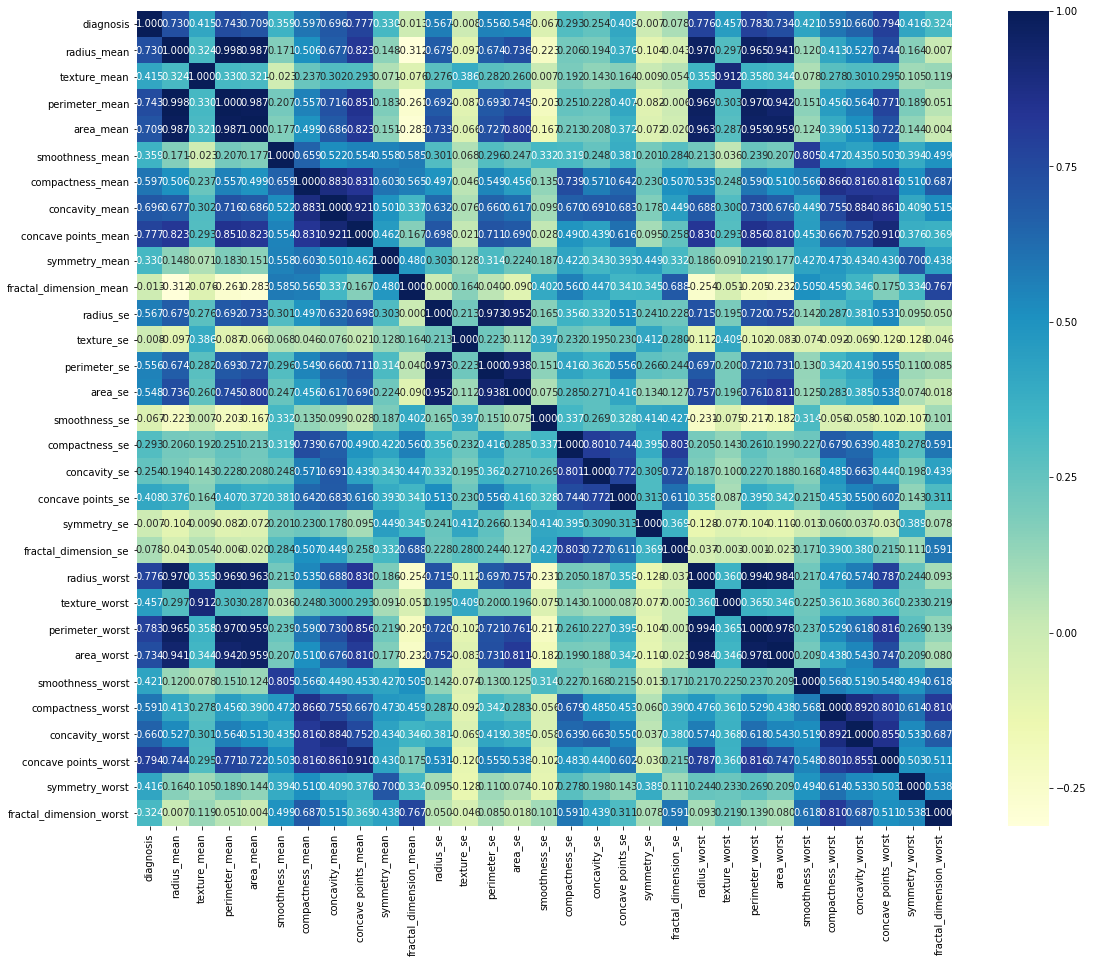

In [6]:
#correlation among the features
features_mean= list(dataset.columns)
corr = dataset[features_mean].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'YlGnBu') 
plt.savefig('correlation_Breast_Cancer.png')

In [7]:
columns = dataset.columns
print(columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
#Dropping features not needed
drop_list = ['radius_mean','texture_mean', 'perimeter_mean',
               'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'symmetry_mean', 'fractal_dimension_mean',
               'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
               'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
               'fractal_dimension_se', 'texture_worst','area_worst','smoothness_worst',
               'compactness_worst', 'concavity_worst','symmetry_worst', 'fractal_dimension_worst']

dataset = dataset.drop(drop_list, axis=1)
print(dataset.head())

   diagnosis  concave points_mean  radius_worst  perimeter_worst  \
0          1              0.14710         25.38           184.60   
1          1              0.07017         24.99           158.80   
2          1              0.12790         23.57           152.50   
3          1              0.10520         14.91            98.87   
4          1              0.10430         22.54           152.20   

   concave points_worst  
0                0.2654  
1                0.1860  
2                0.2430  
3                0.2575  
4                0.1625  


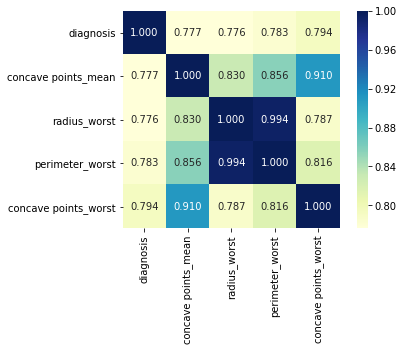

In [9]:
#Best correlation among features
features_mean= list(dataset)
corr = dataset[features_mean].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'YlGnBu') 
plt.savefig('correlation_Breast_Cancer_2_classes.png')

##### Seperating features from class label

In [10]:
drop_feature = ['perimeter_worst', 'concave points_worst', 'radius_worst', 'concave points_mean']
y = dataset.drop(drop_feature, axis=1)
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [11]:
drop_features = ['diagnosis']
X = dataset.drop(drop_features, axis=1)
X.head()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,0.14710,25.38,184.60,0.2654
1,0.07017,24.99,158.80,0.1860
2,0.12790,23.57,152.50,0.2430
3,0.10520,14.91,98.87,0.2575
4,0.10430,22.54,152.20,0.1625


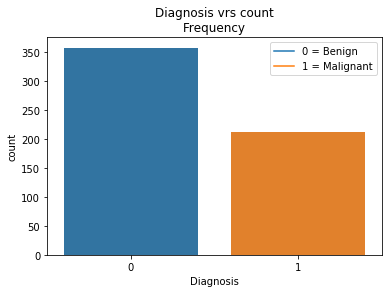

In [12]:
# Frequency of the diagnoses
sns.countplot(y["diagnosis"])
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Diagnosis vrs count\nFrequency")
plt.legend()

# Non-linear Separation Visualization


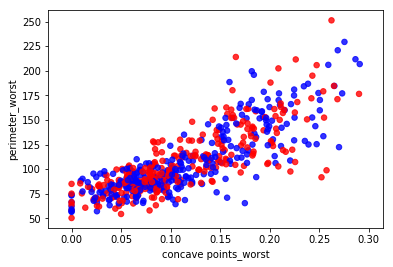

In [13]:
dataset.plot(kind='scatter', x='concave points_worst', y='perimeter_worst', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

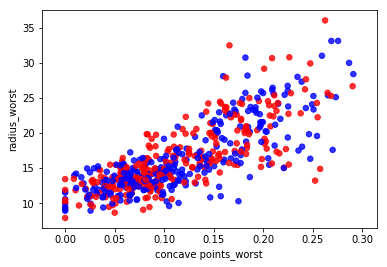

In [14]:
dataset.plot(kind='scatter', x='concave points_worst', y='radius_worst', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

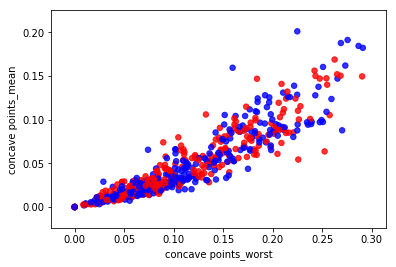

In [15]:
dataset.plot(kind='scatter', x='concave points_worst', y='concave points_mean', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

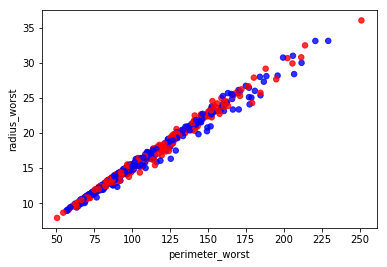

In [16]:
dataset.plot(kind='scatter', x='perimeter_worst', y='radius_worst', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

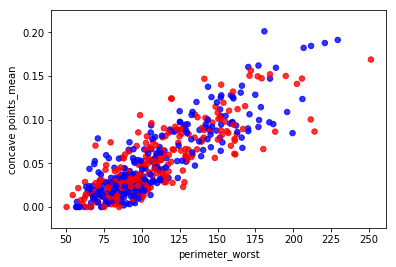

In [17]:
dataset.plot(kind='scatter', x='perimeter_worst', y='concave points_mean', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

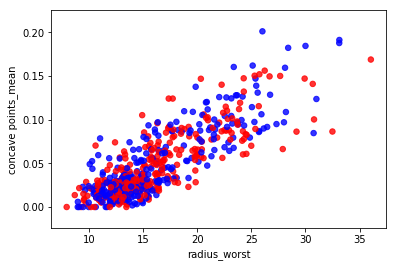

In [18]:
dataset.plot(kind='scatter', x='radius_worst',  y='concave points_mean', color = ['blue', 'red'] ,alpha=0.8, s=30)
plt.show()

##### Is there any non-linearly separation among the classes in your dataset? Discover and plot out all features among the features
There is non-linearly seperation among the classes of my dataset. In the scattered plot diagram below you can conclude that no linear marginary line can be draw to seperate both classes from each other. Hence, this shows that my dataset is a non-linearly seperable dataset.

##### Scatter plot of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D55D86E9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D55DA61080>]], dtype=object)

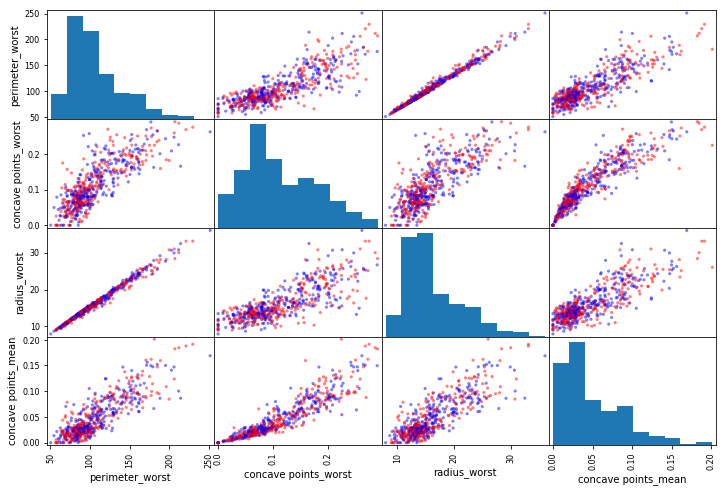

In [19]:
from pandas.plotting import scatter_matrix
scatt = ['perimeter_worst', 'concave points_worst', 'radius_worst', 'concave points_mean']
scatter_matrix(X[scatt], figsize=(12, 8), color = ['red', 'blue'], s=40)

### Splitting Dataset in train and test set

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
train_X.shape

(381, 4)

In [22]:
test_X.shape

(188, 4)

In [23]:
train_y.shape

(381, 1)

In [24]:
test_y.shape

(188, 1)

# Scale the data
##### Why is it important to scale the inputs when using SVM?
It is very important to scale inputs when using SVM because SVM's tries to find the largest possible “street” between the classes, so if the training set is not scaled, the SVM will tend to neglect small features.

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Select a few options of SVM classifiers, train them, and find multiple performance measures of the model

##### SVM Model

In [26]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42, C=1.0, coef0=1.0)
svm_classifier.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
#Make a prediction
svm_predict = svm_classifier.predict(test_X)
svm_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

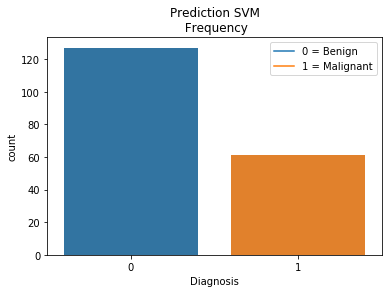

In [28]:
#Visualization 
sns.countplot(svm_predict)
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Prediction SVM\n Frequency")
plt.legend()

In [29]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_y, svm_predict)

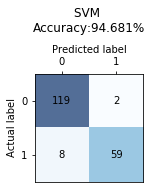

In [30]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('SVM \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, svm_predict)))
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,
            s=cm_svm[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [31]:
#Precision and recall, F1-score for SVM
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision SVM: {0:.3%} ".format(precision_score(test_y, svm_predict)))
print ("Recall SVM:    {0:.3%} ".format(recall_score(test_y, svm_predict)))
print("F1-Score SVM:  {0:.3%} ".format(f1_score(test_y, svm_predict)))

Precision SVM: 96.721% 
Recall SVM:    88.060% 
F1-Score SVM:  92.187% 


In [32]:
#Mean and root square error SVM
from sklearn.metrics import mean_squared_error
print("Mean squared error SVM: {0:.3%} ".format(mean_squared_error(test_y, svm_predict)))
rootMeanSquaredError_svm  = sqrt(mean_squared_error(test_y, svm_predict))
print ("Root mean squared error SVM: {0:.3%} ".format(rootMeanSquaredError_svm/10))

Mean squared error SVM: 5.319% 
Root mean squared error SVM: 2.306% 


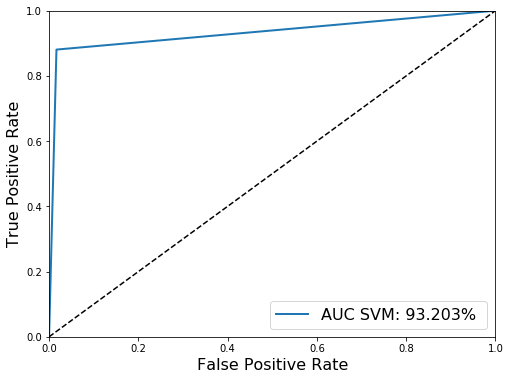

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_svm, tpr_svm, thresholds = roc_curve(test_y, svm_predict)

def plot_roc_curve(fpr_svm, tpr_svm, label=None):
    plt.plot(fpr_svm, tpr_svm, linewidth=2, label="AUC SVM: {0:.3%} ".format(roc_auc_score(test_y, svm_predict)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_svm, tpr_svm)
plt.show()

In [34]:
#Area under the curve
from sklearn.metrics import roc_auc_score
print("Area under the ROC SVM: {0:.3%} ".format(roc_auc_score(test_y, svm_predict)))

Area under the ROC SVM: 93.203% 


##### Scholastic Gradient Descent with Confusion_matrix, Precision and recall_score, F1-Score

In [35]:
#Scolastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_classifer = SGDClassifier(random_state=0, penalty='l1', alpha=0.1)
sgd_classifer.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [36]:
#Make a prediction
predict_sgd_y = sgd_classifer.predict(test_X)
print(predict_sgd_y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0]


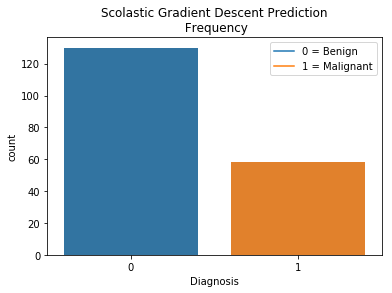

In [37]:
#Visualization of the Scolastic Gradient Descent Prediction 
sns.countplot(predict_sgd_y)
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Scolastic Gradient Descent Prediction\n Frequency")
plt.legend()

In [38]:
# Making the Confusion Matrix for Scolastic Gradient Descent
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(test_y, predict_sgd_y)

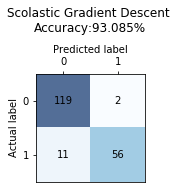

In [39]:
#Confusion matrix
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_sdg, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Scolastic Gradient Descent \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_sgd_y)))
for i in range(cm_sdg.shape[0]):
    for j in range(cm_sdg.shape[1]):
        ax.text(x=j, y=i,
            s=cm_sdg[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [40]:
#Precision and recall, F1-score for Scolastic Gradient Descent
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Scolastic Gradient Descent: {0:.3%} ".format(precision_score(test_y, predict_sgd_y)))
print ("Recall Scolastic Gradient Descent:    {0:.3%} ".format(recall_score(test_y, predict_sgd_y)))
print("F1-Score Scolastic Gradient Descent:  {0:.3%} ".format(f1_score(test_y, predict_sgd_y)))

Precision Scolastic Gradient Descent: 96.552% 
Recall Scolastic Gradient Descent:    83.582% 
F1-Score Scolastic Gradient Descent:  89.600% 


In [41]:
#Mean square error Scolatic Gradient Descent
from sklearn.metrics import mean_squared_error
print("Mean squared error Scolastic Gradient Descent:       {0:.3%} ".format(mean_squared_error(test_y, predict_sgd_y)))
rootMeanSquaredError_sdg  = sqrt(mean_squared_error(test_y, predict_sgd_y))
print ("Root mean squared error Scolastic Gradient Descent : {0:.3%} ".format(rootMeanSquaredError_sdg/10))

Mean squared error Scolastic Gradient Descent:       6.915% 
Root mean squared error Scolastic Gradient Descent : 2.630% 


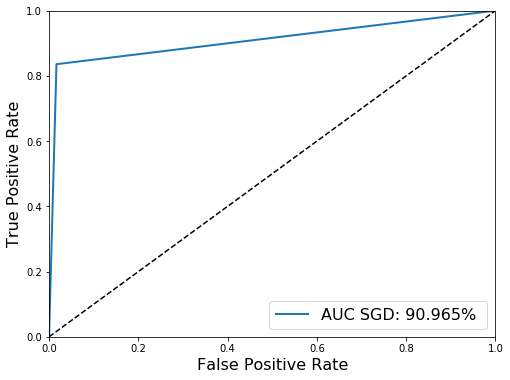

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_sgd,tpr_sgd, thresholds = roc_curve(test_y, predict_sgd_y)

def plot_roc_curve(fpr_sgd, tpr_sgd, label=None):
    plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="AUC SGD: {0:.3%} ".format(roc_auc_score(test_y, predict_sgd_y)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

##### Which one yields the best performance measure for your dataset?
The SVM model yields the best result as compared to the SGD model. The SVM produced the following results:                                                       
Precision SVM: 96.721%                                                  
Recall SVM:    88.060%                                          
F1-Score SVM:  92.187%  
Area under the ROC SVM: 93.203%  
Mean squared error SVM: 5.319%                                               
Root mean squared error SVM: 2.306%%

##### See if you can get them to produce roughly the same model? 
I tried to see if I can get the model to be close to the SVM kernel by tunning the parameters of the SGD model. This was how close it got to.

Precision SVM: 96.552%                                                  
Recall Scolastic Gradient Descent:    83.582%                                          
F1-Score Scolastic Gradient Descent:  89.600%  
AUC SGD: 90.965% 
Mean squared error Scolastic Gradient Descent:       6.915%                                               
Root mean squared error Scolastic Gradient Descent : 2.630%

# Integrate an RBF kernel

In [43]:
from sklearn.svm import SVC
svm_kernel = SVC(random_state=0, kernel='rbf', gamma=0.03, C=2.0)
svm_kernel.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
#Make a prediction
svm_kernel_predict = svm_kernel.predict(test_X)
svm_kernel_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [45]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_svm_k = confusion_matrix(test_y, svm_kernel_predict)

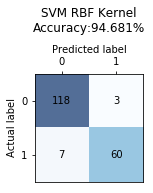

In [46]:
#Confusion matrix
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_svm_k, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('SVM RBF Kernel\nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, svm_kernel_predict)))
for i in range(cm_svm_k.shape[0]):
    for j in range(cm_svm_k.shape[1]):
        ax.text(x=j, y=i,
            s=cm_svm_k[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [47]:
#Precision and recall, F1-score for (RBF Kernel)
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision SVM (RBF Kernel): {0:.3%} ".format(precision_score(test_y, svm_kernel_predict)))
print ("Recall (RBF Kernel):        {0:.3%} ".format(recall_score(test_y, svm_kernel_predict)))
print("F1-Score (RBF Kernel):      {0:.3%} ".format(f1_score(test_y, svm_kernel_predict)))

Precision SVM (RBF Kernel): 95.238% 
Recall (RBF Kernel):        89.552% 
F1-Score (RBF Kernel):      92.308% 


In [48]:
#Mean square error Scolatic Gradient Descent
from sklearn.metrics import mean_squared_error
print("Mean squared errorSVM (RBF Kernel):       {0:.3%} ".format(mean_squared_error(test_y, svm_kernel_predict)))
rootMeanSquaredError_svm_k  = sqrt(mean_squared_error(test_y, svm_kernel_predict))
print ("Root mean squared error SVM (RBF Kernel) : {0:.3%} ".format(rootMeanSquaredError_svm_k/10))

Mean squared errorSVM (RBF Kernel):       5.319% 
Root mean squared error SVM (RBF Kernel) : 2.306% 


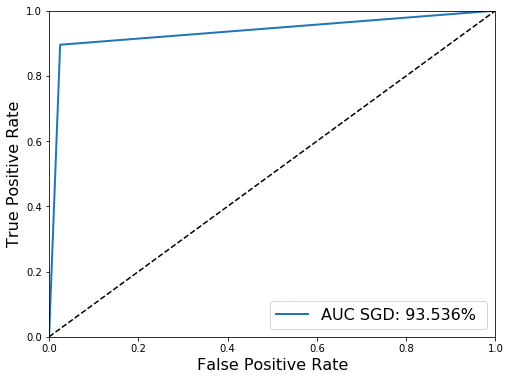

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_svm_k,tpr_svm_k, thresholds = roc_curve(test_y, svm_kernel_predict)

def plot_roc_curve(fpr_svm_k,tpr_svm_k, label=None):
    plt.plot(fpr_svm_k,tpr_svm_k, linewidth=2, label="AUC SGD: {0:.3%} ".format(roc_auc_score(test_y, svm_kernel_predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_svm_k,tpr_svm_k)
plt.show()

##### If it seems to underfit the training set, should you increase or decrease the value of /gamma? What about the value of C?
If an SVM classifier trained with an RBF Kernel seems to undersift the training set, theres a possibility of regularization so to decrease it, you need to increase gamma or C. Also, you can increase both gamma and C.

### Plot all ROC with AUC together

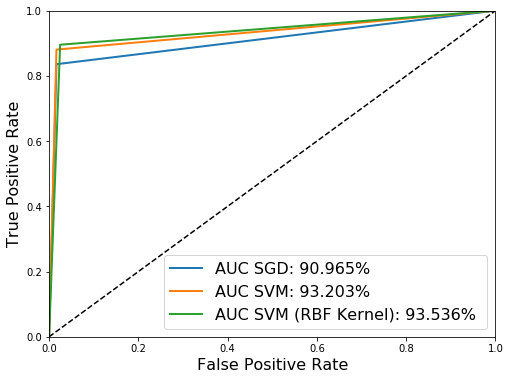

In [50]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(8,6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="AUC SGD: {0:.3%} ".format(roc_auc_score(test_y, predict_sgd_y)))
plt.plot(fpr_svm, tpr_svm, linewidth=2, label="AUC SVM: {0:.3%} ".format(roc_auc_score(test_y, svm_predict)))
plt.plot(fpr_svm_k,tpr_svm_k, linewidth=2, label="AUC SVM (RBF Kernel): {0:.3%} ".format(roc_auc_score(test_y, svm_kernel_predict)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Present your solution
##### How can you pitch your solution to this project?
I think that based on this model, I will recommend we tune the svc parameters efficiently to produce a better result. Overrall, with the results from the svm model I think thats a great result and future tunning the parameters can reproduce a more better result.
##### What did you learn so far about the problem?
I really learned alot from this model. I learned that the Support Vector Machine is a really great classifier that will works really great with small and medium sized data. Also, I learned that, scaling the data is very important in svm model. Based on the few features I used, the SVM did really good in classifing my data well. Prior to the previous models we developed, the SVM seems to come out as the best model so far. 

# Plan for the future of your system
##### Do you need to get more data? If yes, explain how
No! I dont need to get more data. The dataset provided was enough to predict whether a cancer is Malignant or Benign. However, some of the features were not important and had bad correlation among them. So taking them out was the best way to have a better prediction. Based on those 4 features, my model was able to produce great results.
##### Does your model work well for the future? If not, which model should be further investigated?
I think the model will work great for the future. The SVM will be able to predict well based on any medium sized dataset you fit in. Also, in the future, I will tune the SVC parameters very well to obtain a more better results or predictions. I have tried several models on this dataset and by far, I am very impressed with how this model worked with my dataset.
##### Do you satisfy with your system? What do you think needed to improve?
I am very satisfied with the system, my model was able to produce a great prediction on whether a cancer is Malignant or Benign
